### Salary_hike -> Build a prediction model for Salary_hike

In [75]:
# importing imp library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
%matplotlib inline

In [39]:
# loading a dataset
df=pd.read_csv('Salary_Data.csv')

In [40]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [41]:
# EDA

In [42]:
df.shape

(30, 2)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [44]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [45]:
# checking for null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [46]:
# finding correlation between target and feature
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


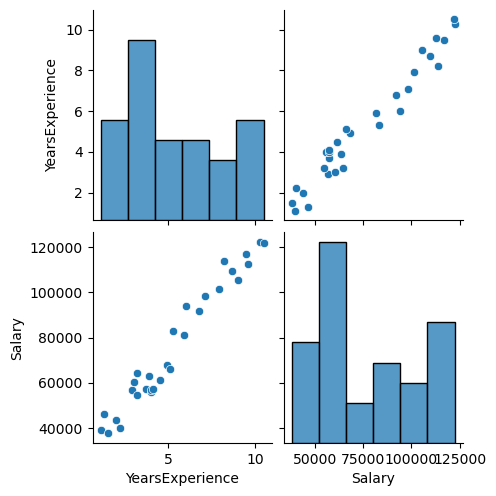

In [47]:
sns.pairplot(df)

#### insight: From this pairplot we can say that there is maximun sort of correlation between target and feature i.e YearsExperiance and Salary.

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


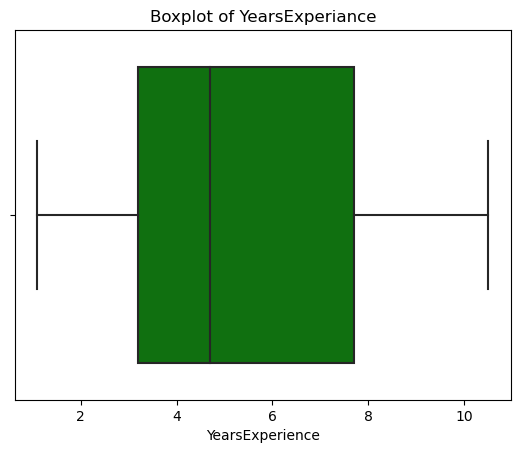

In [48]:
#boxplot of years 0f experience time
sns.boxplot(df['YearsExperience'],color='green')
plt.title('Boxplot of YearsExperiance')
plt.show()

  #### Insights:  From this boxplot visualization we can say that the majority of experiance is lies between approximately 3 to 8 years.
  

C:\Users\prash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


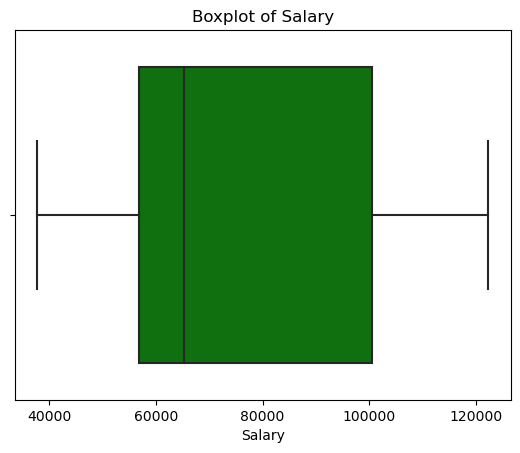

In [49]:
#boxplot of salary
sns.boxplot(df['Salary'],color='green')
plt.title('Boxplot of Salary')
plt.show()

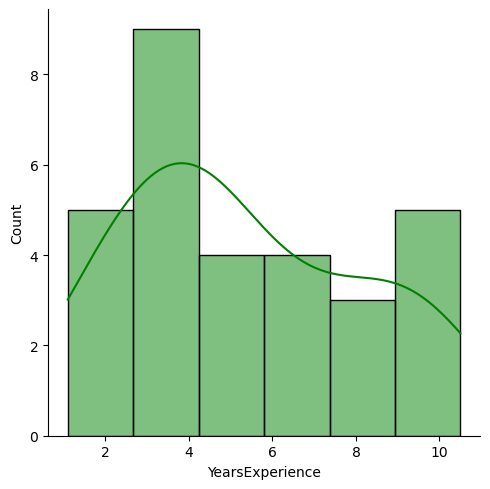

In [50]:
sns.displot(data=df,x='YearsExperience',color='green',kde=True)

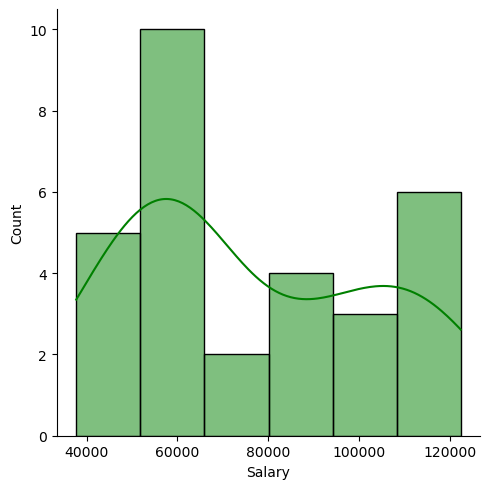

In [51]:
sns.displot(data=df,x='Salary',color='green',kde=True)

In [52]:
# spliting in to target and feature
x=pd.DataFrame(df['YearsExperience'])
y=pd.DataFrame(df['Salary'])

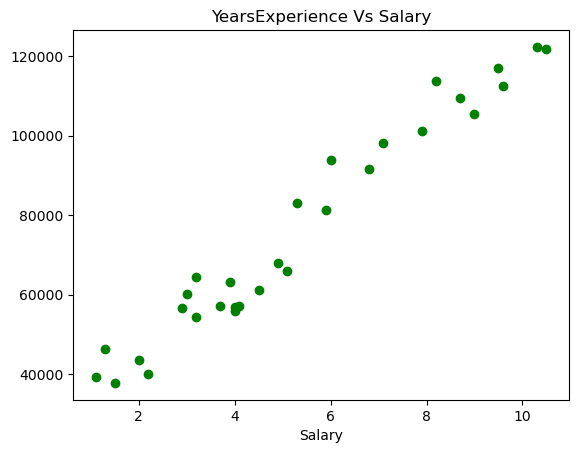

In [53]:
# plotting scatter plot
plt.scatter(df['YearsExperience'],df['Salary'],color='Green')
plt.xlabel('YearsExperience')
plt.xlabel('Salary')
plt.title('YearsExperience Vs Salary')
plt.show()

### From the above scatter plot we can say that there is a sort of linear realtionship between target and variable.

In [54]:
# splitting data in to train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24, 1)
(6, 1)


In [56]:
# Train the algorithm
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [57]:
# Rerive the intercept
b=lr.intercept_
b

array([24393.16915195])

In [58]:
# Retrieve the slope
m=lr.coef_
m

array([[9569.58688543]])

In [59]:
X_test

,YearsExperience
1,1.3
0,1.1
14,4.5
9,3.7
21,7.1
19,6.0


In [60]:
# Predicted Value
y_pred=lr.predict(X_test)
y_pred
pd.DataFrame(data=y_pred,columns=['predicted value of Salary'])

,predicted value of Salary
0,36833.632103
1,34919.714726
2,67456.310136
3,59800.640628
4,92337.236039
5,81810.690465


In [61]:
#Actual value of Delivery Time
y_test

,Salary
1,46205.0
0,39343.0
14,61111.0
9,57189.0
21,98273.0
19,93940.0


In [62]:
# Evaluate the alogorithm
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Eroor:',metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 6802.779572073898
Mean Squared Eroor: 56137509.9978255
Mean Absolute Error: 7492.496913434499


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

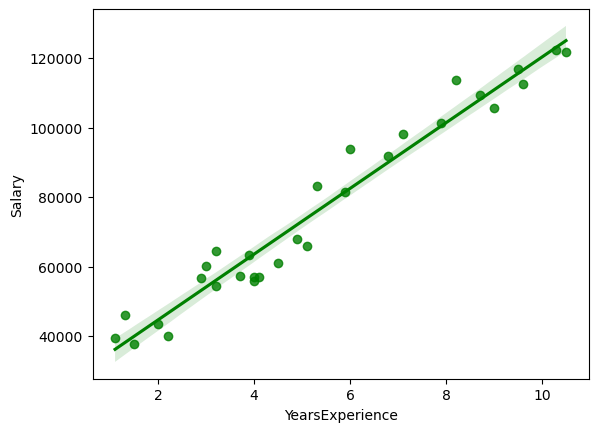

In [63]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'],color='Green',marker='o')

In [64]:
# predicting For individual value for Delivery Time
# y = mx + b

In [65]:
y=m * 7 + b
m * 2 + b

array([[43532.34292281]])

In [66]:
m * 4.0 + b

array([[62671.51669368]])

### 1) Applying logarithmic transformation

In [99]:
# Separate the independent and dependent variables
x = pd.DataFrame((df['YearsExperience']))
y = pd.DataFrame(np.log(df['Salary']))


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

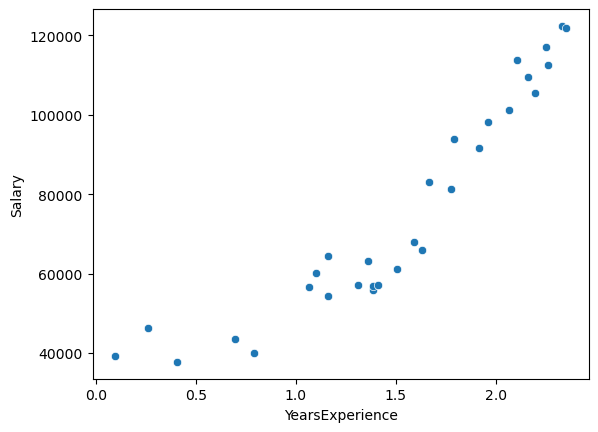

In [100]:
sns.scatterplot(data=df,x=np.log(df['YearsExperience']),y=df['Salary'])

In [101]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [102]:
# Fit a linear regression model on the training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [103]:
# Predict the dependent variable using the model on the testing data
y_pred = model.predict(x_test)
y_pred

array([[10.66784512],
       [10.64306126],
       [11.06438691],
       [10.96525146],
       [11.38657711],
       [11.25026587]])

In [104]:
x_test

,YearsExperience
1,1.3
0,1.1
14,4.5
9,3.7
21,7.1
19,6.0


In [105]:
# Compute the R-squared score on the testing data
r2 = r2_score(y_test, y_pred)
print('R-squared score :', r2)

R-squared score : 0.9075891390660923


### 2) Applying squareroot Transformationm

In [106]:
# Separate the independent and dependent variables
x = pd.DataFrame((df['YearsExperience']))
y = pd.DataFrame(np.sqrt(df['Salary']))


In [107]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [108]:
# Fit a linear regression model on the training data
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [109]:
# Predict the dependent variable using the model on the testing data
y_pred = model1.predict(x_test)


In [110]:
# Compute the R-squared score on the testing data
r2 = r2_score(y_test,y_pred )
print('R-squared score :', r2)

R-squared score : 0.9058844354481091


In [111]:
# # Compute the R-squared score on the testing data
# r2 = r2_score(np.power(y_test,2) ,np.power(y_pred,2))
# print('R-squared score :', r2)

### 3) Reciprocal Transformation

In [112]:
# taking a dependent and independent variable
x = pd.DataFrame(df['YearsExperience'])
y = pd.DataFrame(1/df['Salary'])


In [113]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [114]:
# Fit a linear regression model on the training data
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [115]:
# Predict the dependent variable using the model on the testing data
y_pred = model2.predict(x_test)

In [116]:
# Compute the R-squared score on the testing data
r2 = r2_score(y_test,y_pred )
print('R-squared score :', r2)

R-squared score : 0.8700140104665314


###  4) Exponenial Transformation

In [117]:
# taking a dependent and independent variable
x = pd.DataFrame(df['YearsExperience'])
y = pd.DataFrame(df['Salary'])

In [118]:
#  Apply exponential transformation to the dependent variable
y_transformed=np.log(y)

In [119]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=2)

In [120]:
# Fit a linear regression model on the transformed training data
model3 = LinearRegression()
model3.fit(x_train, y_train)

LinearRegression()

In [121]:
# Predict the transformed dependent variable using the model on the testing data
y_pred_transformed = model3.predict(x_test)

In [122]:
# Inverse transform the predicted dependent variable back to the original scale
y_pred = np.exp(y_pred_transformed)

In [123]:
# Calculate the R-squared score for the model on the testing data
r2 = r2_score(y_test, y_pred_transformed)
print('R-squared score:', r2)
# print('Mean squared error:', mse)

R-squared score: 0.9075891390660923
